<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/Projects_Inventory_Optimization_Via_Demand_Forecasting_Analyzing_Sales_Data_and_Market_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objectives **

In this notebook, we are going to create, evaluate and compare several models for forcasting  product demand

**WORKFLOW**

For this project , we would be:



1.   Loading up dailing  demand data for 5 year

2.   Understanding data

1.   Data cleaning

1.   Trends Visualizations

1.   Forecast modelling and results:
        XGBOOST
        ARIMA
        SARIMA
        EXPONENTIAL SMOOTHING

        *METRICS*

        MEAN ABSOLUTE ERROR

        MEAN ABSOLUTE PERCENTAGE ERROR
        
        ROOT MEAN SQUARED




**LOAD DATA AND IMPORT LIBRAIRIES**

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')



In [122]:
# load data

# installing gdown to download files from Google Drive

!pip install gdown
# importing gdown
import gdown

# Download the file from Google Drive (replace with the correct file ID)

   ####### Electic Vehicules Distribution Data ##########

''' pour avoir l'id du fichier, il faut aller dans partager le fichier dans google,
donner les droits a tous les utilisateurs et copier l'id le lien qui se trouve dans le lien. Voici un exemple'''

#https://drive.google.com/file/d/1hzJEQj29huiVGLkHNFddROBbIr_wPlmR/view?usp=sharing
file1_id = "1hzJEQj29huiVGLkHNFddROBbIr_wPlmR" # using actual id
#output_file
output_file1 = "Historical Demand Data.csv"
#download  the file
gdown.download(id=file1_id, output=output_file1, quiet=False)

df = pd.read_csv(output_file1)


   ####### Geospatial Data ##########
   #https://drive.google.com/file/d/1j3DzVqpb1ssalkmdgYXHlJ9w8RokpB95/view?usp=sharing

'''file2_id = "1j3DzVqpb1ssalkmdgYXHlJ9w8RokpB95" # using actual id
#output_file
output_file2 = "geospatial_dataset.csv"
#download  the file
gdown.download(id=file2_id, output=output_file2, quiet=False)

Geospatial_Data = pd.read_csv(output_file2)



   ####### Weather Data ##########
   #https://drive.google.com/file/d/1HQvHCPlNwdRrZTzgvgV4NxT4BYxz1rPS/view?usp=sharing
file3_id = "1HQvHCPlNwdRrZTzgvgV4NxT4BYxz1rPS" # using actual id
#output_file
output_file3 = "weather_dataset.csv"
#download  the file
gdown.download(id=file3_id, output=output_file3, quiet=False)

Weather_Data = pd.read_csv(output_file3)'''

Downloading...
From: https://drive.google.com/uc?id=1hzJEQj29huiVGLkHNFddROBbIr_wPlmR
To: /content/Historical Demand Data.csv
100%|██████████| 236k/236k [00:00<00:00, 58.9MB/s]


'file2_id = "1j3DzVqpb1ssalkmdgYXHlJ9w8RokpB95" # using actual id\n#output_file\noutput_file2 = "geospatial_dataset.csv"\n#download  the file\ngdown.download(id=file2_id, output=output_file2, quiet=False)\n\nGeospatial_Data = pd.read_csv(output_file2)\n\n\n\n   ####### Weather Data ##########\n   #https://drive.google.com/file/d/1HQvHCPlNwdRrZTzgvgV4NxT4BYxz1rPS/view?usp=sharing\nfile3_id = "1HQvHCPlNwdRrZTzgvgV4NxT4BYxz1rPS" # using actual id\n#output_file\noutput_file3 = "weather_dataset.csv"\n#download  the file\ngdown.download(id=file3_id, output=output_file3, quiet=False)\n\nWeather_Data = pd.read_csv(output_file3)'

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9140 entries, 0 to 9139
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        9140 non-null   object
 1   Product_id  9140 non-null   object
 2   Demand      9140 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 214.3+ KB


**DATA UNDERSTANDING**

In [124]:
df.head()

,Date,Product_id,Demand
0,2012-01-01,Product_001,3
1,2012-01-01,Product_002,1
2,2012-01-01,Product_003,3
3,2012-01-01,Product_004,3
4,2012-01-01,Product_005,7


In [125]:
df.shape

(9140, 3)

In [126]:
df.columns

Index(['Date', 'Product_id', 'Demand'], dtype='object')

In [127]:
# How many product's demand were recored
df['Product_id'].nunique()

5

In [128]:
# what are they ?
df['Product_id'].unique()

array(['Product_001', 'Product_002', 'Product_003', 'Product_004',
       'Product_005'], dtype=object)

In [129]:
# what is the average demand across years
df['Demand'].mean()

17.673960612691467

In [130]:
# median
df['Demand'].median()

16.0

In [131]:
# Standard deviation (variance)
df['Demand'].std()

9.796140707286517

**DATA CLEANING**

In [132]:
# checking for missing values
df.isna().sum()

Date          0
Product_id    0
Demand        0
dtype: int64

In [133]:
### No missing values in this dataset

In [134]:
# 5 year period dataset
df['Date'].min()

'2012-01-01'

In [135]:
# 5 year period dataset
df['Date'].max()

'2017-01-01'

In [136]:
df.dtypes

Date          object
Product_id    object
Demand         int64
dtype: object

In [137]:
# We are to convert object type to int type for Date label

In [138]:
# getting the first  item
df['Date'].iloc[0]

'2012-01-01'

In [139]:
# set the Date column as the new index
df = df.set_index('Date')

# convert the datatype in this new index  from string to datetime pandas variable
df.index = pd.to_datetime(df.index)

In [140]:
df.dtypes

Product_id    object
Demand         int64
dtype: object

In [141]:
df.head(10)

,Product_id,Demand
Date,,
2012-01-01,Product_001,3
2012-01-01,Product_002,1
2012-01-01,Product_003,3
2012-01-01,Product_004,3
2012-01-01,Product_005,7
2012-01-02,Product_001,7
2012-01-02,Product_002,2
2012-01-02,Product_003,9
2012-01-02,Product_004,9


**TRENDS VISUALIZATION/EXPLORATORY DATA ANALYSIS**

In [142]:
color_pal

[(0.0, 0.5607843137254902, 0.8352941176470589),
 (0.9882352941176471, 0.30980392156862746, 0.18823529411764706),
 (0.8980392156862745, 0.6823529411764706, 0.2196078431372549),
 (0.42745098039215684, 0.5647058823529412, 0.30980392156862746),
 (0.5450980392156862, 0.5450980392156862, 0.5450980392156862),
 (0.5058823529411764, 0.058823529411764705, 0.48627450980392156)]

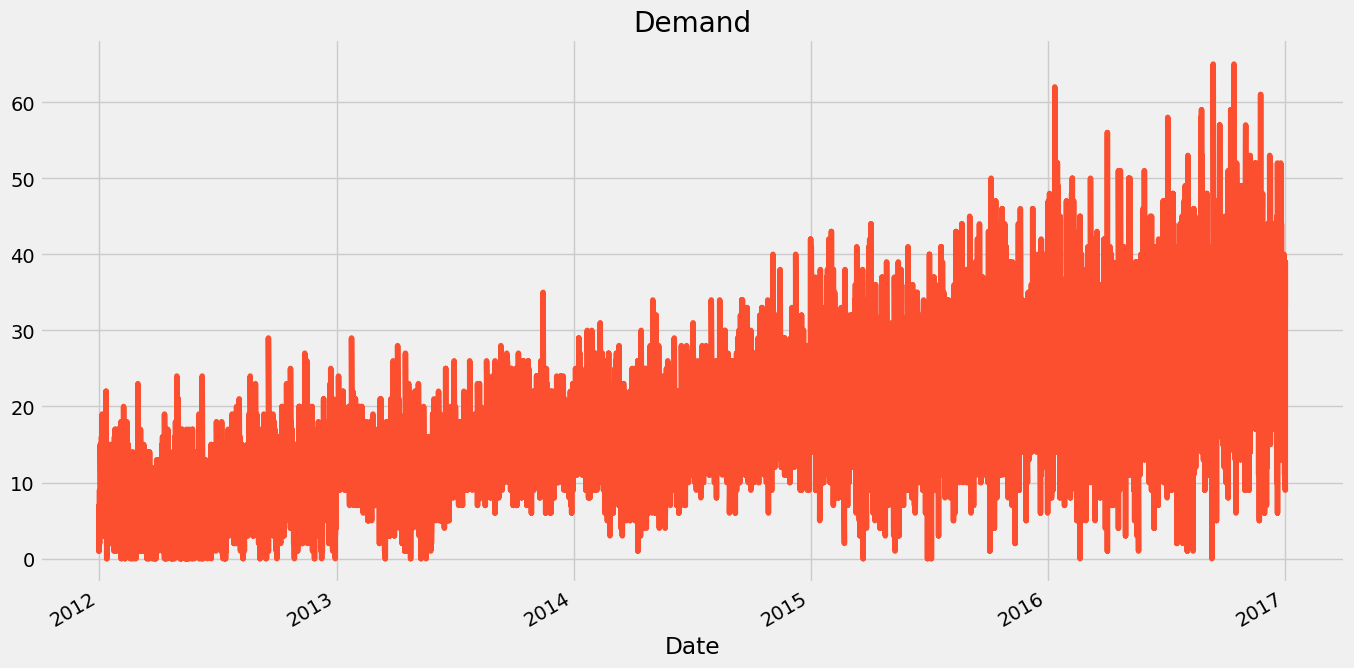

In [143]:
# demand values across the years

df['Demand'].plot(kind="line", color = color_pal[1], figsize=(15,8), title = "Demand")
plt.show()

Average inscreases as years progresses

The variance in demand values also increases

The data is clustered and we would need more granular plot


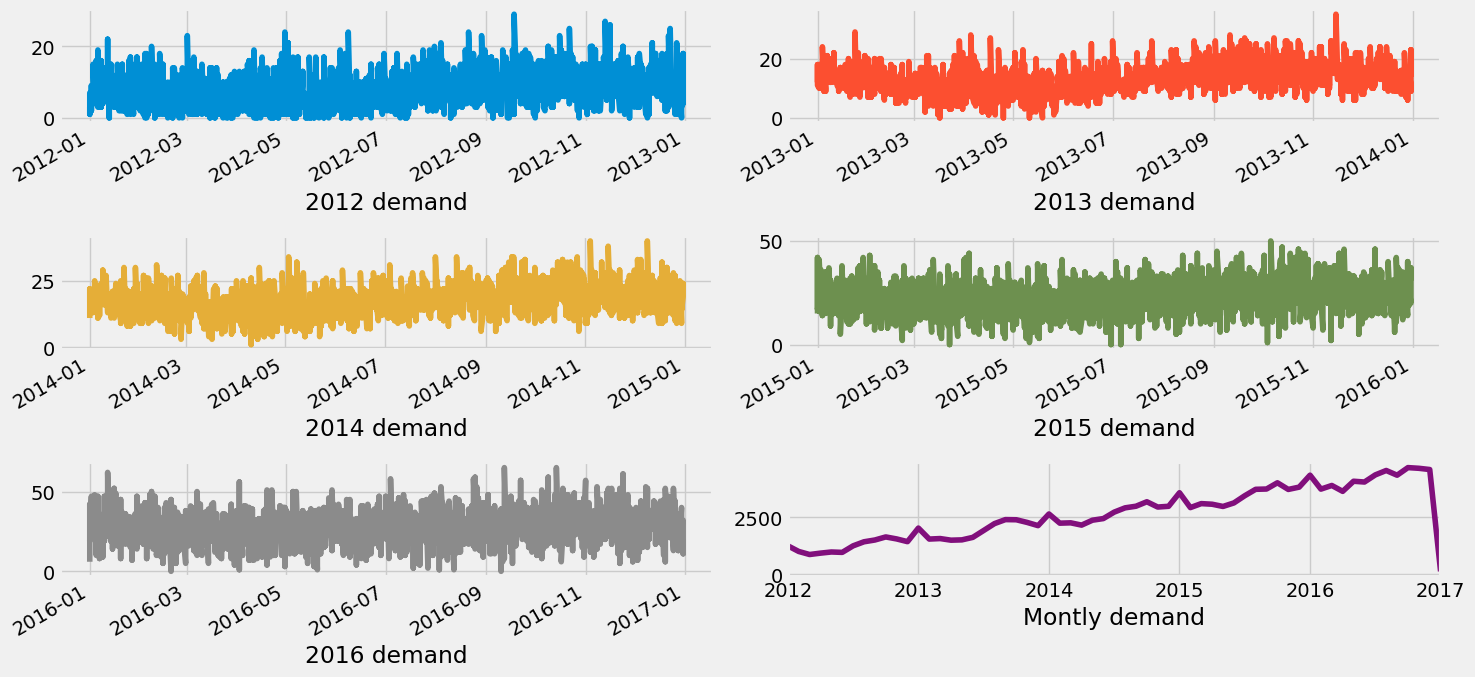

In [144]:
# visualize each year in a dedicated subplot

# create my subplots
fig, axs = plt.subplots(3, 2, figsize=(15,7))

# select_data.plot(args)

df.loc[(df.index < '2013-01-01' ) & (df.index >= '2012-01-01')]['Demand'].plot(kind ="line", ax=axs[0,0], color = color_pal[0], xlabel="2012 demand")

df.loc[(df.index < '2014-01-01' ) & (df.index >= '2013-01-01')]['Demand'].plot(kind ="line", ax=axs[0,1], color = color_pal[1], xlabel="2013 demand")

df.loc[(df.index < '2015-01-01' ) & (df.index >= '2014-01-01')]['Demand'].plot(kind ="line", ax=axs[1,0], color = color_pal[2], xlabel="2014 demand")

df.loc[(df.index < '2016-01-01' ) & (df.index >= '2015-01-01')]['Demand'].plot(kind ="line", ax=axs[1,1], color = color_pal[3], xlabel="2015 demand")

df.loc[(df.index < '2017-01-01' ) & (df.index >= '2016-01-01')]['Demand'].plot(kind ="line", ax=axs[2,0], color = color_pal[4], xlabel="2016 demand")

df.resample("M").sum()['Demand'].plot(kind ="line", ax=axs[2,1], color = color_pal[5], xlabel="Montly demand")

# tighten/ajust layout
plt.tight_layout()

# show
plt.show()



In [145]:
df.index

DatetimeIndex(['2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-02', '2012-01-02', '2012-01-02',
               '2012-01-02', '2012-01-02',
               ...
               '2016-12-31', '2016-12-31', '2016-12-31', '2016-12-31',
               '2016-12-31', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Date', length=9140, freq=None)

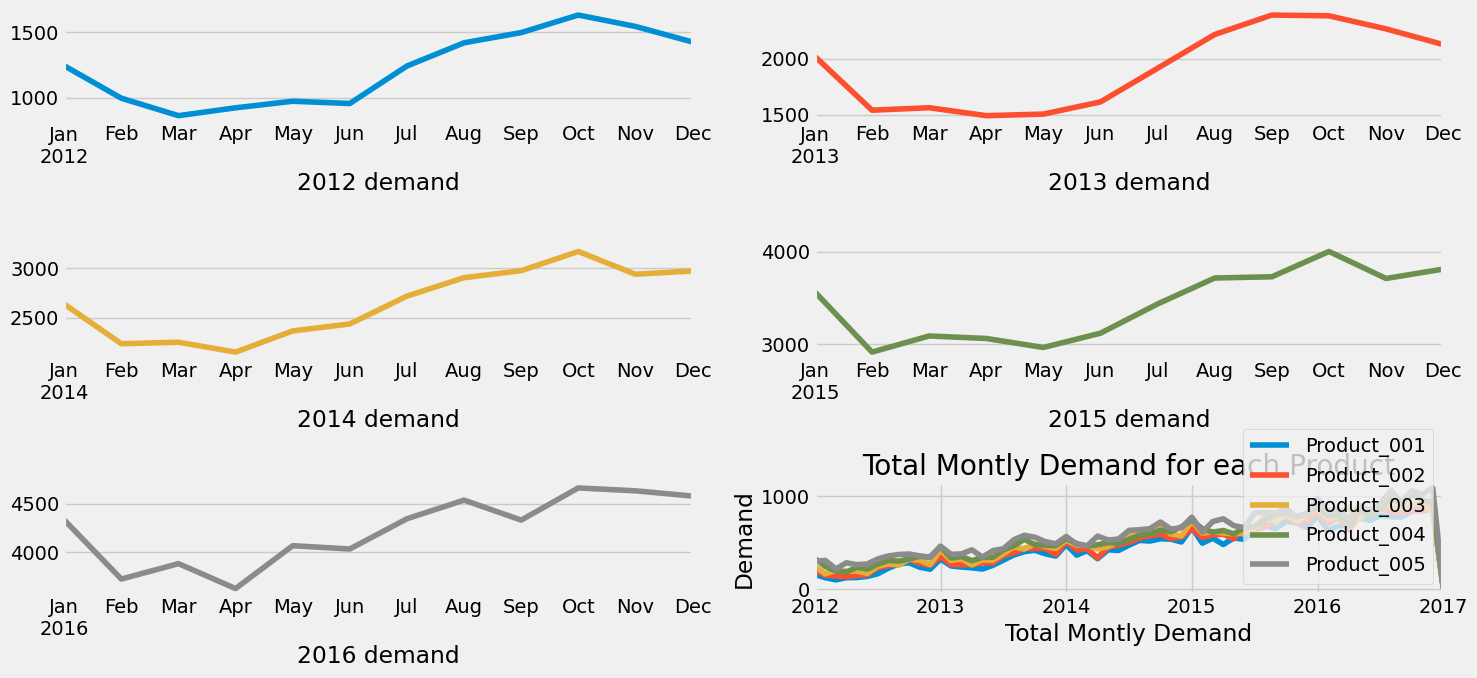

In [146]:
# visualize each year montly summed demand  in a dedicated subplot

# create my subplots
fig, axs = plt.subplots(3, 2, figsize=(15,7))

# select_data.plot(args)

df.loc[(df.index < '2013-01-01' ) & (df.index >= '2012-01-01')].resample("M").sum()['Demand'].plot(kind ="line", ax=axs[0,0], color = color_pal[0], xlabel="2012 demand")

df.loc[(df.index < '2014-01-01' ) & (df.index >= '2013-01-01')].resample("M").sum()['Demand'].plot(kind ="line", ax=axs[0,1], color = color_pal[1], xlabel="2013 demand")

df.loc[(df.index < '2015-01-01' ) & (df.index >= '2014-01-01')].resample("M").sum()['Demand'].plot(kind ="line", ax=axs[1,0], color = color_pal[2], xlabel="2014 demand")

df.loc[(df.index < '2016-01-01' ) & (df.index >= '2015-01-01')].resample("M").sum()['Demand'].plot(kind ="line", ax=axs[1,1], color = color_pal[3], xlabel="2015 demand")

df.loc[(df.index < '2017-01-01' ) & (df.index >= '2016-01-01')].resample("M").sum()['Demand'].plot(kind ="line", ax=axs[2,0], color = color_pal[4], xlabel="2016 demand")

# iteratively select each project based on id
for product in df['Product_id'].unique():
  # get total montly demand values for each product

  product_montly_demand = df[df['Product_id'] == product].resample("M").sum()['Demand']
  product_montly_demand.plot(kind ="line", ax=axs[2,1], label=product)

axs[2,1].set_xlabel("Total Montly Demand")
axs[2,1].set_ylabel("Demand")
axs[2,1].set_title("Total Montly Demand for each Product")
axs[2,1].legend(loc = "lower right")

# tighten/ajust layout
plt.tight_layout()

# show
plt.show()


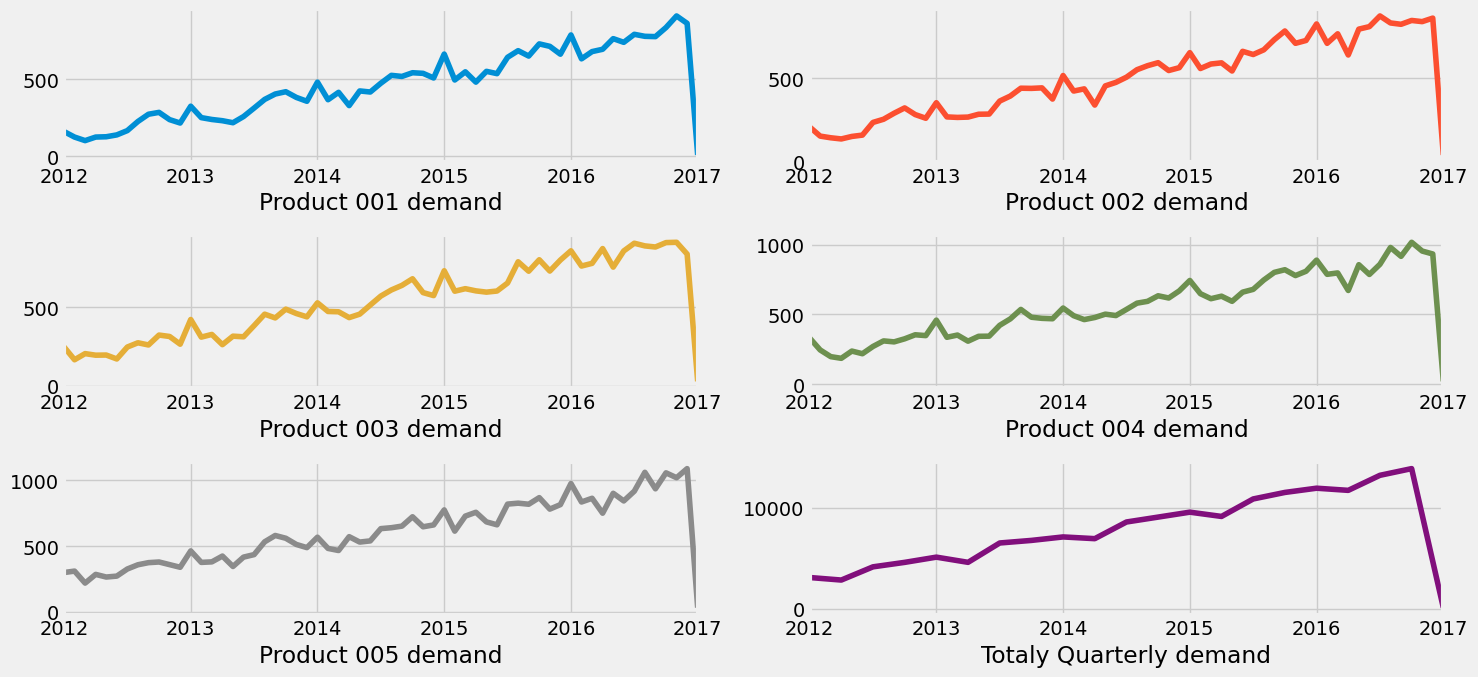

In [147]:
# plot each product total demand  on a montly basis across the 5 year period


# create subplots
fig, axs = plt.subplots(3, 2, figsize=(15,7))

# select data on product basis, resample and get sum on a montlybasis.plot(args)
df[df['Product_id'] == "Product_001"].resample("M").sum()['Demand'].plot(kind ="line", ax=axs[0,0], color = color_pal[0], xlabel="Product 001 demand")

df[df['Product_id'] == "Product_002"].resample("M").sum()['Demand'].plot(kind ="line", ax=axs[0,1], color = color_pal[1], xlabel="Product 002 demand")
df[df['Product_id'] == "Product_003"].resample("M").sum()['Demand'].plot(kind ="line", ax=axs[1,0], color = color_pal[2], xlabel="Product 003 demand")
df[df['Product_id'] == "Product_004"].resample("M").sum()['Demand'].plot(kind ="line", ax=axs[1,1], color = color_pal[3], xlabel="Product 004 demand")
df[df['Product_id'] == "Product_005"].resample("M").sum()['Demand'].plot(kind ="line", ax=axs[2,0], color = color_pal[4], xlabel="Product 005 demand")

df.resample("Q").sum()['Demand'].plot(kind ="line", ax=axs[2,1], color = color_pal[5], xlabel="Totaly Quarterly demand")

# tighten/ajust layout
plt.tight_layout()

# show
plt.show()


**  FEATURE ENGINEERING**

In [148]:
# LETS create the function that extracts date feature    --> day of the week, week, Month ,quarter, Year

def extract_features(dataframe):
  """
  This function extracts date features from a date index, saving it  to a new column
  """

  dataframe = dataframe.copy()
  dataframe['day of week'] = dataframe.index.dayofweek
  dataframe['month'] = dataframe.index.month
  dataframe['quarter'] = dataframe.index.quarter
  dataframe['year'] = dataframe.index.year
  dataframe['week'] = dataframe.index.isocalendar().week.astype(int)


  return dataframe

In [149]:
df = extract_features(df)

In [150]:
df.dtypes

Product_id     object
Demand          int64
day of week     int32
month           int32
quarter         int32
year            int32
week            int64
dtype: object

**CREATING SEVERAL FORECAST MODELS EVALUATING**

FOR EACH MODEL CANDIDATE


For each product



1.   we create a model

2.   We evaluate the model with MAPE, MAE, RMSE scores

3.   Visualize the forecast on the test set


2.   Élément de liste



In [151]:
# Creating a function that would help evaluate the models

from sklearn.metrics import mean_absolute_error, mean_squared_error

def compute_scores(predicted_values, actual_values):
  # calculate MAE
  mae = mean_absolute_error(actual_values, predicted_values)

  # Calculate RMSE
  rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

  # calculate MAPE
  mape = np.mean(abs(actual_values - predicted_values) / (actual_values +1) * 100)

  return mae, rmse, mape


  # Calculate MAPE

In [152]:
# train_test split
df_train = df.loc[df.index < '2016-01-01'].copy()
df_test = df.loc[df.index >= '2016-01-01'].copy()

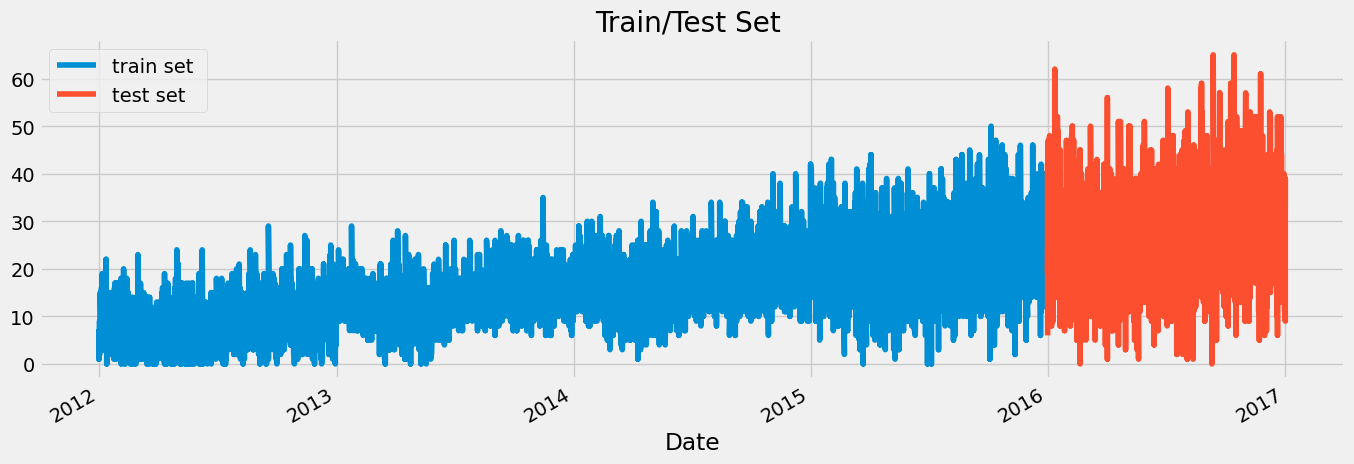

In [153]:
# visualize train and test set
fig, ax = plt.subplots(figsize=(15,5))

df_train['Demand'].plot(ax=ax, label='train set ', legend="train set", title="Train/Test Set ")
df_test['Demand'].plot(ax=ax, label='test set ', legend="test set")

plt.show()

In [154]:
# XGBOOST

# FORECAST ON A WEEKLY / MONTLY BASIS


# FIT THE MODEL ON PRODUCT 001 TO 005




In [155]:
!pip install xgboost

In [156]:
df.dtypes

Product_id     object
Demand          int64
day of week     int32
month           int32
quarter         int32
year            int32
week            int64
dtype: object

In [157]:
df.columns

Index(['Product_id', 'Demand', 'day of week', 'month', 'quarter', 'year',
       'week'],
      dtype='object')

In [158]:
# features, target variable

features = ['day of week', 'month', 'quarter', 'year', 'week']
target = ['Demand']

In [159]:
from xgboost import XGBRegressor
# number of estimators = 1000
# learning rate = 0.01


In [160]:
# for each product
# subselect the product data
# collect features and target
# train model
# evaluate model
# stores results

In [161]:
xgboost_model_resultat = {
    'product': [],
    'mae': [],
    'rmse': [],
    'mape': [],
    'pred':[],
    'y_test': []
}

for prod_id in df_train["Product_id"].unique():
  # subselect according to product
  df_train_prod_id = df_train[df_train["Product_id"] == prod_id].resample("W").sum()
  df_test_prod_id = df_test[df_test["Product_id"] == prod_id].resample("W").sum()

  # extracting features
  X_tain = df_train_prod_id[features]
  y_train = df_train_prod_id[target]

  X_test = df_test_prod_id[features]
  y_test = df_test_prod_id[target]

  # initialize train model
  model = XGBRegressor(n_estimators=1000, learning_rate=0.01, early_stopping_rounds=50)

  # train model
  model.fit(X_tain, y_train, eval_set=[(X_tain, y_train), (X_test, y_test)], verbose=50)

  # evaluating and storing results
  pred = model.predict(X_test)
  mae, rmse, mape = compute_scores(pred, y_test.values)
  xgboost_model_resultat["product"].append(prod_id)
  xgboost_model_resultat["mae"].append(mae)
  xgboost_model_resultat["rmse"].append(rmse)
  xgboost_model_resultat["mape"].append(mape)
  xgboost_model_resultat["pred"].append(pred)
  xgboost_model_resultat["y_test"].append(y_test.Demand.values)

  xgboost_model_resultats_weekly =pd.DataFrame(xgboost_model_resultat)

[0]	validation_0-rmse:41.97119	validation_1-rmse:89.45979
[50]	validation_0-rmse:27.74872	validation_1-rmse:70.89556
[100]	validation_0-rmse:19.30388	validation_1-rmse:59.79893
[150]	validation_0-rmse:14.40169	validation_1-rmse:53.20568
[200]	validation_0-rmse:11.50232	validation_1-rmse:49.35488
[250]	validation_0-rmse:9.71813	validation_1-rmse:47.16169
[300]	validation_0-rmse:8.54957	validation_1-rmse:45.83502
[350]	validation_0-rmse:7.80013	validation_1-rmse:45.14376
[400]	validation_0-rmse:7.20244	validation_1-rmse:44.77545
[450]	validation_0-rmse:6.72877	validation_1-rmse:44.61238
[500]	validation_0-rmse:6.23497	validation_1-rmse:44.53743
[550]	validation_0-rmse:5.84743	validation_1-rmse:44.41478
[600]	validation_0-rmse:5.55415	validation_1-rmse:44.35301
[650]	validation_0-rmse:5.28373	validation_1-rmse:44.31026
[700]	validation_0-rmse:5.03125	validation_1-rmse:44.23769
[750]	validation_0-rmse:4.67240	validation_1-rmse:44.16229
[800]	validation_0-rmse:4.29057	validation_1-rmse:44.1

In [162]:
xgboost_model_resultats_weekly.dtypes

product     object
mae        float64
rmse       float64
mape       float64
pred        object
y_test      object
dtype: object

In [163]:
xgboost_model_resultats_weekly[['mae', 'rmse', 'mape']].mean()

mae     40.476039
rmse    47.820682
mape    23.053624
dtype: float64

In [164]:
xgboost_model_resultat = {
    'product': [],
    'mae': [],
    'rmse': [],
    'mape': [],
    'pred':[],
    'y_test': []
}

for prod_id in df_train["Product_id"].unique():
  # subselect according to product
  df_train_prod_id = df_train[df_train["Product_id"] == prod_id].resample("M").sum()
  df_test_prod_id = df_test[df_test["Product_id"] == prod_id].resample("M").sum()

  # extracting features
  X_tain = df_train_prod_id[features]
  y_train = df_train_prod_id[target]

  X_test = df_test_prod_id[features]
  y_test = df_test_prod_id[target]

  # initialize train model
  model = XGBRegressor(n_estimators=1000, learning_rate=0.01, early_stopping_rounds=50)

  # train model
  model.fit(X_tain, y_train, eval_set=[(X_tain, y_train), (X_test, y_test)], verbose=50)

  # evaluating and storing results
  pred = model.predict(X_test)
  mae, rmse, mape = compute_scores(pred, y_test.values)
  xgboost_model_resultat["product"].append(prod_id)
  xgboost_model_resultat["mae"].append(mae)
  xgboost_model_resultat["rmse"].append(rmse)
  xgboost_model_resultat["mape"].append(mape)
  xgboost_model_resultat["pred"].append(pred)
  xgboost_model_resultat["y_test"].append(y_test.Demand.values)

  xgboost_model_resultats_monthly =pd.DataFrame(xgboost_model_resultat)

[0]	validation_0-rmse:174.41538	validation_1-rmse:383.91489
[50]	validation_0-rmse:121.56338	validation_1-rmse:340.00162
[100]	validation_0-rmse:86.32807	validation_1-rmse:319.20089
[150]	validation_0-rmse:62.01056	validation_1-rmse:306.93146
[200]	validation_0-rmse:44.80790	validation_1-rmse:299.07483
[250]	validation_0-rmse:32.48077	validation_1-rmse:294.52326
[300]	validation_0-rmse:23.87459	validation_1-rmse:290.30553
[350]	validation_0-rmse:17.87465	validation_1-rmse:287.34020
[400]	validation_0-rmse:13.65887	validation_1-rmse:284.47423
[450]	validation_0-rmse:10.45461	validation_1-rmse:282.75089
[500]	validation_0-rmse:8.10889	validation_1-rmse:281.99982
[550]	validation_0-rmse:6.37002	validation_1-rmse:281.68855
[600]	validation_0-rmse:5.03751	validation_1-rmse:281.31879
[650]	validation_0-rmse:4.01494	validation_1-rmse:281.15813
[700]	validation_0-rmse:3.16520	validation_1-rmse:280.55609
[750]	validation_0-rmse:2.43502	validation_1-rmse:280.07387
[800]	validation_0-rmse:1.88860

In [165]:
xgboost_model_resultats_monthly

,product,mae,rmse,mape,pred,y_test
0,Product_001,250.399857,279.353648,409.354219,"[565.34863, 337.55298, 551.7671, 178.96552, 56...","[787, 632, 679, 694, 763, 739, 791, 778, 776, ..."
1,Product_002,247.401046,273.731312,125.886018,"[577.43604, 338.56833, 573.98114, 222.44229, 5...","[824, 708, 765, 638, 793, 808, 872, 830, 822, ..."
2,Product_003,265.229544,312.184811,168.873331,"[638.9284, 284.41745, 639.1474, 275.6432, 618....","[859, 762, 779, 873, 755, 858, 907, 890, 883, ..."
3,Product_004,284.794695,309.406493,233.336731,"[614.55945, 336.20322, 618.83685, 252.97173, 6...","[890, 788, 798, 672, 857, 787, 860, 981, 917, ..."
4,Product_005,245.653705,259.776940,170.563924,"[689.1896, 446.60056, 731.7866, 486.14313, 728...","[974, 834, 862, 749, 900, 842, 916, 1059, 934,..."


In [166]:
xgboost_model_resultats_weekly['mape'].mean()

23.053624256328153

In [167]:
xgboost_model_resultats_monthly['mape'].mean()

221.6028447669387

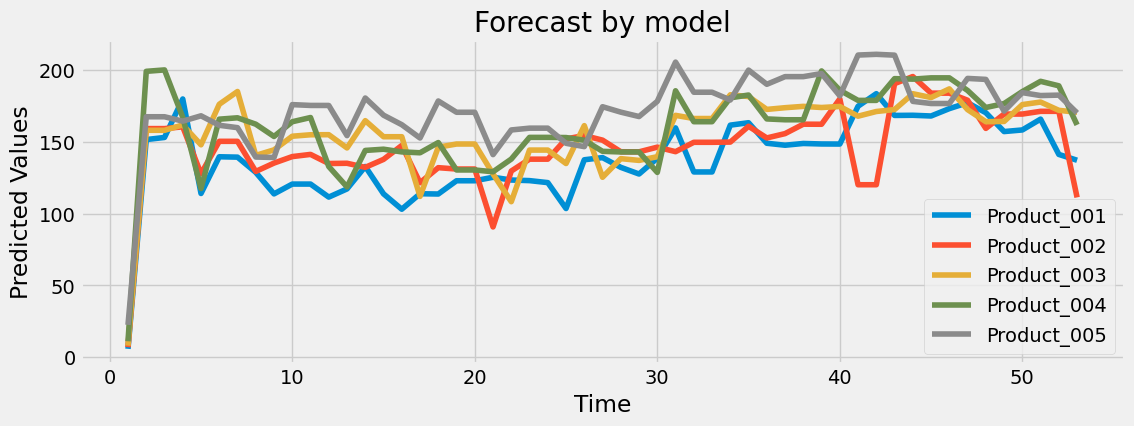

In [168]:
# Plot predicitions for all products on one plot
plt.figure(figsize=(12,4))

# iterativily go throught the entire dataframe
for i, row in xgboost_model_resultats_weekly.iterrows():
  plt.plot(range(1, len(row['pred']) +1), row['pred'], label=row['product'])

# set label(x, y)
plt.xlabel("Time")
plt.ylabel("Predicted Values")

# set title
plt.title("Forecast by model")

# create legende
plt.legend()

# show
plt.show()

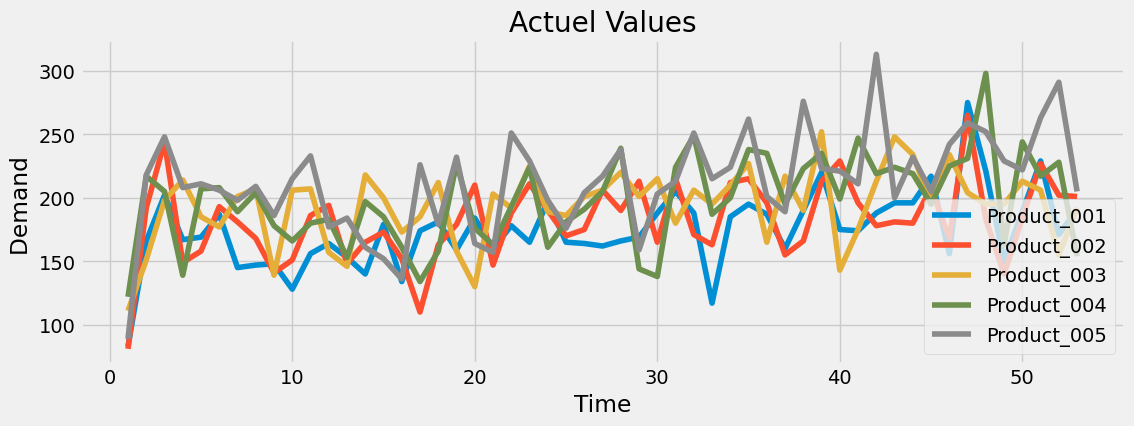

In [169]:
# Plot predicitions for all products on one plot
plt.figure(figsize=(12,4))

# iterativily go throught the entire dataframe
for i, row in xgboost_model_resultats_weekly.iterrows():
  plt.plot(range(1, len(row['y_test']) +1), row['y_test'], label=row['product'])

# set label(x, y)
plt.xlabel("Time")
plt.ylabel("Demand ")

# set title
plt.title("Actuel Values")

# create legende
plt.legend()

# show
plt.show()

**TIME SERIES ANALYSIS **

Let's Perform Several Time Series Analysis  Methods

In [170]:
#ARINA
#SARINA
#EXPONENTIAL SMOOTHING

In [171]:
# imports

#Adjust models
from statsmodels.tsa.arima.model import ARIMA

arima_model_resultat = {
    'product': [],
    'mae': [],
    'rmse': [],
    'mape': [],
    'pred':[],
    'y_test': []
}

for prod_id in df_train["Product_id"].unique():
  # subselect according to product
  df_train_prod_id = df_train[df_train["Product_id"] == prod_id].resample("W").sum()
  df_test_prod_id = df_test[df_test["Product_id"] == prod_id].resample("W").sum()

  # extracting features
  y_train = df_train_prod_id[target]

  y_test = df_test_prod_id[target]

  # initialize train model
  order = (1,1,1) # p(autoregressive), d(differing component), q(moving average )
  model = ARIMA(y_train, order=order)

  # train model
  model_fit = model.fit()

  # evaluating and storing results
  pred = model_fit.forecast(len(y_test))
  y_test = y_test.values.reshape(-1)



  mae, rmse, mape = compute_scores(pred, y_test)
  arima_model_resultat["product"].append(prod_id)
  arima_model_resultat["mae"].append(mae)
  arima_model_resultat["rmse"].append(rmse)
  arima_model_resultat["mape"].append(mape)
  arima_model_resultat["pred"].append(pred.values)
  arima_model_resultat["y_test"].append(y_test)

  arima_model_resultats_weekly =pd.DataFrame(arima_model_resultat)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.p

In [172]:
arima_model_resultats_weekly

,product,mae,rmse,mape,pred,y_test
0,Product_001,43.252912,50.162728,23.430104,"[126.15667370199594, 132.93430632272694, 133.8...","[83, 166, 202, 167, 169, 187, 145, 147, 148, 1..."
1,Product_002,39.273536,46.920431,20.647847,"[141.01210883032127, 146.12795591996192, 146.7...","[81, 192, 244, 149, 158, 193, 181, 168, 141, 1..."
2,Product_003,36.416148,41.130539,18.150014,"[159.54846669441667, 163.5363015757889, 163.99...","[111, 151, 198, 214, 185, 177, 201, 207, 139, ..."
3,Product_004,39.625191,47.721409,18.625065,"[154.75274604666666, 163.38975534156228, 164.8...","[122, 217, 205, 139, 207, 208, 189, 204, 178, ..."
4,Product_005,49.797747,58.299619,22.454353,"[160.74405674656896, 167.68883420078964, 168.6...","[89, 218, 248, 208, 211, 206, 198, 209, 186, 2..."


In [173]:
arima_model_resultats_weekly['mape'].mean()

20.661476462512372

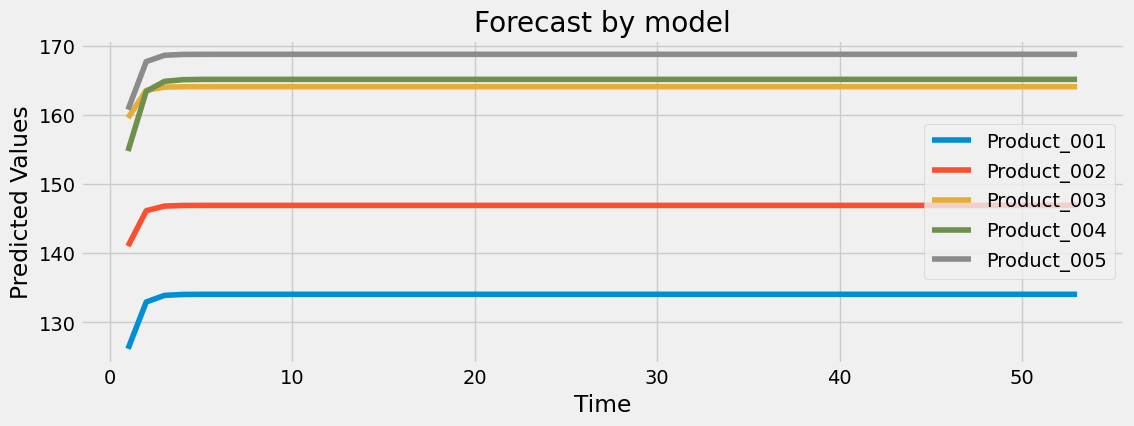

In [174]:
# Plot predicitions for all products on one plot
plt.figure(figsize=(12,4))

# iterativily go throught the entire dataframe
for i, row in arima_model_resultats_weekly.iterrows():
  plt.plot(range(1, len(row['pred']) +1), row['pred'], label=row['product'])

# set label(x, y)
plt.xlabel("Time")
plt.ylabel("Predicted Values")

# set title
plt.title("Forecast by model")

# create legende
plt.legend()

# show
plt.show()

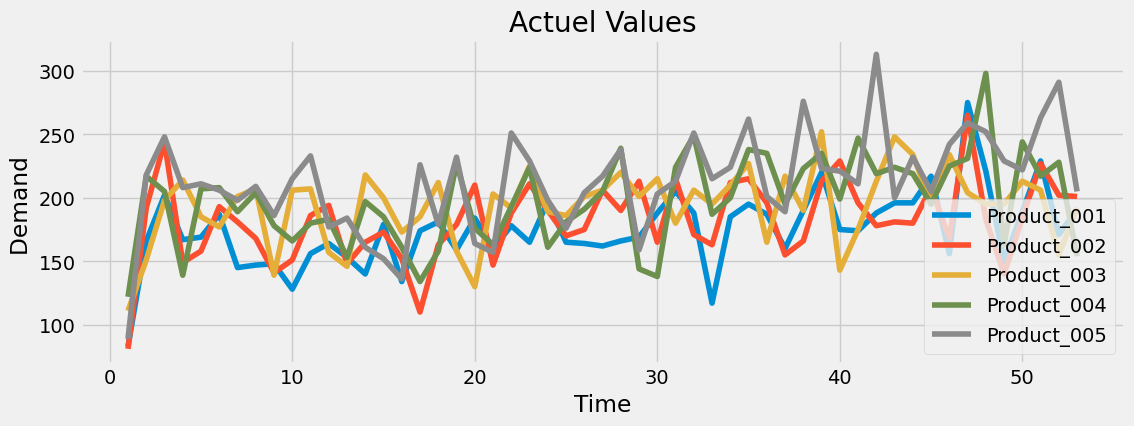

In [175]:
# Plot predicitions for all products on one plot
plt.figure(figsize=(12,4))

# iterativily go throught the entire dataframe
for i, row in arima_model_resultats_weekly.iterrows():
  plt.plot(range(1, len(row['y_test']) +1), row['y_test'], label=row['product'])

# set label(x, y)
plt.xlabel("Time")
plt.ylabel("Demand ")

# set title
plt.title("Actuel Values")

# create legende
plt.legend()

# show
plt.show()

In [176]:
# imports

#Adjust models
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model_resultat = {
    'product': [],
    'mae': [],
    'rmse': [],
    'mape': [],
    'pred':[],
    'y_test': []
}

for prod_id in df_train["Product_id"].unique():
  # subselect according to product
  df_train_prod_id = df_train[df_train["Product_id"] == prod_id].resample("W").sum()
  df_test_prod_id = df_test[df_test["Product_id"] == prod_id].resample("W").sum()

  # extracting features
  y_train = df_train_prod_id[target]

  y_test = df_test_prod_id[target]

  # initialize train model
  order = (1,1,1) # p(autoregressive), d(differing component), q(moving average )
  seasonal_order = (1,1,1,52)
  model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order)

  # train model
  model_fit = model.fit()

  # evaluating and storing results
  pred = model_fit.forecast(len(y_test))
  y_test = y_test.values.reshape(-1)



  mae, rmse, mape = compute_scores(pred, y_test)
  sarima_model_resultat["product"].append(prod_id)
  sarima_model_resultat["mae"].append(mae)
  sarima_model_resultat["rmse"].append(rmse)
  sarima_model_resultat["mape"].append(mape)
  sarima_model_resultat["pred"].append(pred.values)
  sarima_model_resultat["y_test"].append(y_test)

  sarima_model_resultats_weekly =pd.DataFrame(sarima_model_resultat)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/

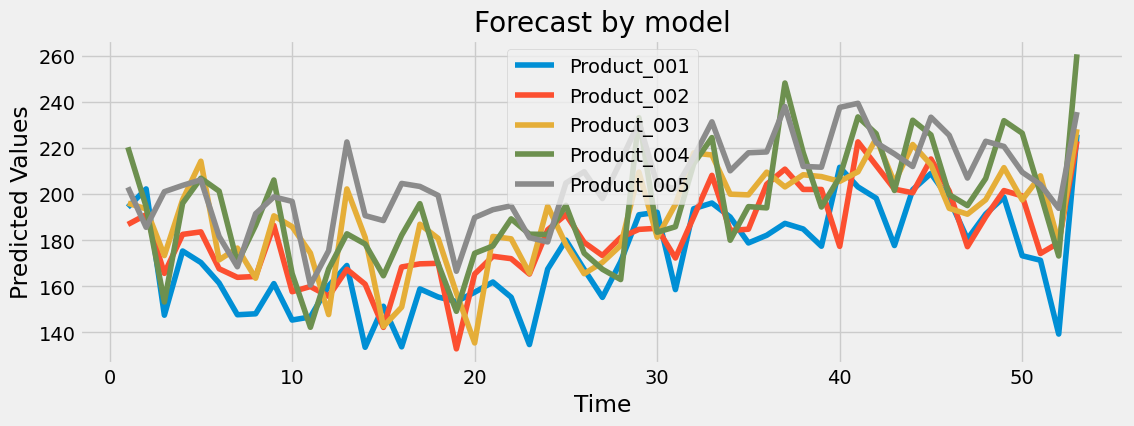

In [177]:
# Plot predicitions for all products on one plot
plt.figure(figsize=(12,4))

# iterativily go throught the entire dataframe
for i, row in sarima_model_resultats_weekly.iterrows():
  plt.plot(range(1, len(row['pred']) +1), row['pred'], label=row['product'])

# set label(x, y)
plt.xlabel("Time")
plt.ylabel("Predicted Values")

# set title
plt.title("Forecast by model")

# create legende
plt.legend()

# show
plt.show()

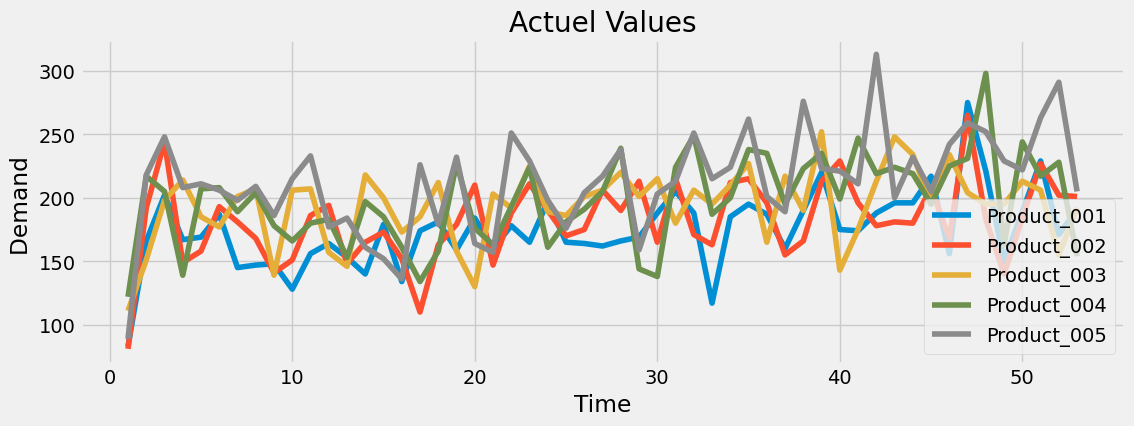

In [178]:
# Plot predicitions for all products on one plot
plt.figure(figsize=(12,4))

# iterativily go throught the entire dataframe
for i, row in sarima_model_resultats_weekly.iterrows():
  plt.plot(range(1, len(row['y_test']) +1), row['y_test'], label=row['product'])

# set label(x, y)
plt.xlabel("Time")
plt.ylabel("Demand ")

# set title
plt.title("Actuel Values")

# create legende
plt.legend()

# show
plt.show()

In [179]:
# Expontential Smoothing

# trend : ADDITIVE or MULTIPLICATIVE

# sessional : ADDITIVE or MULTIPLICATIVE

# sessional_periods = 52



In [180]:
# imports

#Adjust models
from statsmodels.tsa.holtwinters import ExponentialSmoothing

product_forecast_models = []
exp_model_resultat = {
    'product': [],
    'mae': [],
    'rmse': [],
    'mape': [],
    'pred':[],
    'y_test': []
}

for prod_id in df_train["Product_id"].unique():
  # subselect according to product
  df_train_prod_id = df_train[df_train["Product_id"] == prod_id].resample("W").sum()
  df_test_prod_id = df_test[df_test["Product_id"] == prod_id].resample("W").sum()

  # extracting features
  y_train = df_train_prod_id[target]

  y_test = df_test_prod_id[target]

  # initialize train model
  trend = 'add'
  seasonal = 'add'
  seasonal_periods = 52
  model = ExponentialSmoothing(y_train, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)

  # train model
  model_fit = model.fit()
  product_forecast_models.append(model_fit)

  # evaluating and storing results
  pred = model_fit.forecast(steps= len(y_test))
  y_test = y_test.values.reshape(-1)



  mae, rmse, mape = compute_scores(pred, y_test)
  exp_model_resultat["product"].append(prod_id)
  exp_model_resultat["mae"].append(mae)
  exp_model_resultat["rmse"].append(rmse)
  exp_model_resultat["mape"].append(mape)
  exp_model_resultat["pred"].append(pred.values)
  exp_model_resultat["y_test"].append(y_test)

  exp_model_resultats_weekly =pd.DataFrame(exp_model_resultat)

In [181]:
exp_model_resultats_weekly

,product,mae,rmse,mape,pred,y_test
0,Product_001,22.445431,32.118320,13.834749,"[191.65344407468305, 182.14677575320923, 150.6...","[83, 166, 202, 167, 169, 187, 145, 147, 148, 1..."
1,Product_002,29.055951,36.337008,17.408984,"[190.44784822529087, 186.2440318518228, 166.71...","[81, 192, 244, 149, 158, 193, 181, 168, 141, 1..."
2,Product_003,26.879663,33.128622,14.860386,"[202.24351492659315, 192.37980206602822, 178.5...","[111, 151, 198, 214, 185, 177, 201, 207, 139, ..."
3,Product_004,31.412795,39.680426,16.942367,"[218.53897743434197, 195.57067511581363, 173.8...","[122, 217, 205, 139, 207, 208, 189, 204, 178, ..."
4,Product_005,31.895626,40.141301,16.264959,"[206.37704547597235, 193.37486465459796, 198.3...","[89, 218, 248, 208, 211, 206, 198, 209, 186, 2..."


In [182]:
exp_model_resultats_weekly['mape'].mean()

15.86228934769511

In [183]:
sarima_model_resultats_weekly['mape'].mean()

16.325827057676847

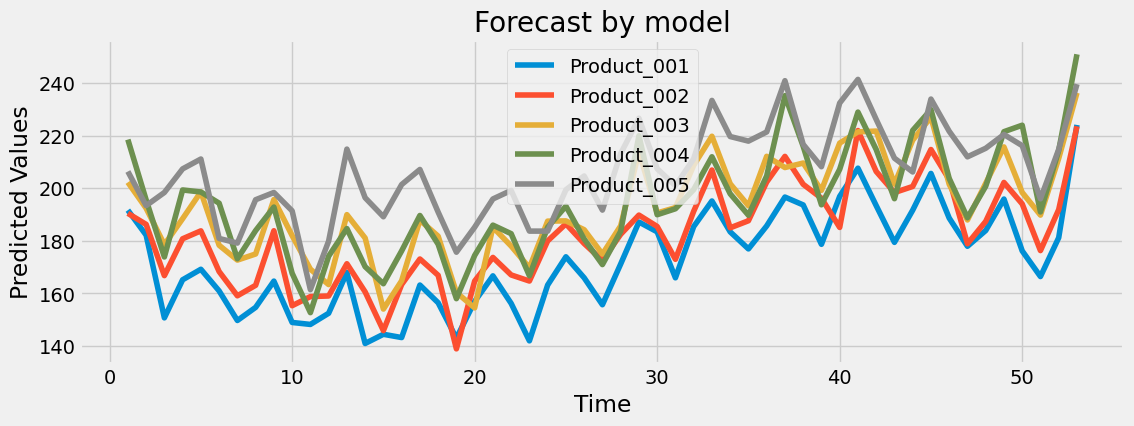

In [184]:
# Plot predicitions for all products on one plot
plt.figure(figsize=(12,4))

# iterativily go throught the entire dataframe
for i, row in exp_model_resultats_weekly.iterrows():
  plt.plot(range(1, len(row['pred']) +1), row['pred'], label=row['product'])

# set label(x, y)
plt.xlabel("Time")
plt.ylabel("Predicted Values")

# set title
plt.title("Forecast by model")

# create legende
plt.legend()

# show
plt.show()

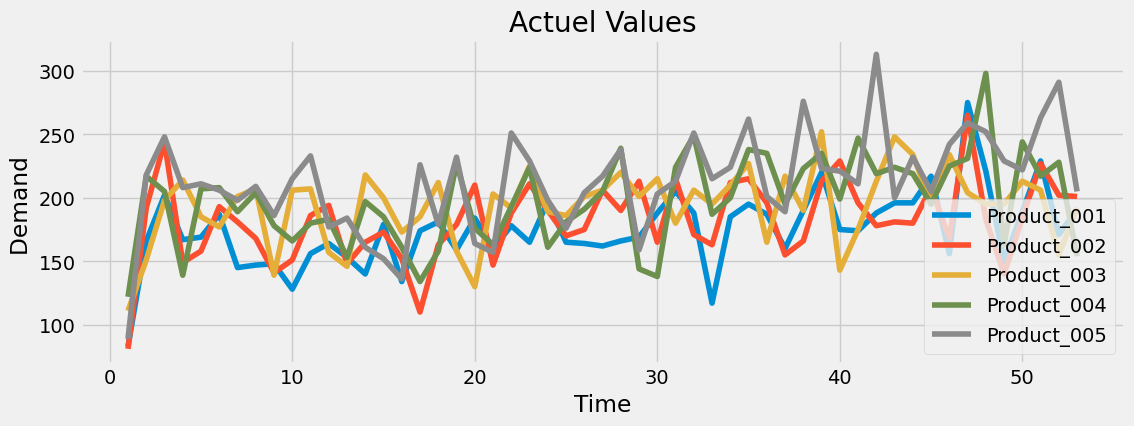

In [185]:
# Plot predicitions for all products on one plot
plt.figure(figsize=(12,4))

# iterativily go throught the entire dataframe
for i, row in exp_model_resultats_weekly.iterrows():
  plt.plot(range(1, len(row['y_test']) +1), row['y_test'], label=row['product'])

# set label(x, y)
plt.xlabel("Time")
plt.ylabel("Demand ")

# set title
plt.title("Actuel Values")

# create legende
plt.legend()

# show
plt.show()

In [186]:
# xgboost, arima, sarima, expontentiel smoothing



**MODEL PERFORMANCES AND FORECAST FUNCTION**

In [187]:
# WEEKLY SUMMED DEMAND >>>>>>>>> MONTHLY SUMMED DEMAND

In [188]:
xgboost_model_resultats_weekly

,product,mae,rmse,mape,pred,y_test
0,Product_001,38.472716,44.088927,24.064875,"[5.7891994, 151.49078, 152.97093, 179.75346, 1...","[83, 166, 202, 167, 169, 187, 145, 147, 148, 1..."
1,Product_002,39.465826,46.336739,23.523591,"[6.9676237, 159.13771, 159.13771, 160.36722, 1...","[81, 192, 244, 149, 158, 193, 181, 168, 141, 1..."
2,Product_003,40.803949,48.272387,22.131423,"[8.010372, 157.94579, 157.94579, 161.68742, 14...","[111, 151, 198, 214, 185, 177, 201, 207, 139, ..."
3,Product_004,39.496003,48.836284,22.632210,"[11.083322, 198.99944, 199.98697, 167.0301, 11...","[122, 217, 205, 139, 207, 208, 189, 204, 178, ..."
4,Product_005,44.141703,51.569075,22.916022,"[22.486252, 167.3847, 167.3847, 164.31114, 168...","[89, 218, 248, 208, 211, 206, 198, 209, 186, 2..."


In [189]:
arima_model_resultats_weekly

,product,mae,rmse,mape,pred,y_test
0,Product_001,43.252912,50.162728,23.430104,"[126.15667370199594, 132.93430632272694, 133.8...","[83, 166, 202, 167, 169, 187, 145, 147, 148, 1..."
1,Product_002,39.273536,46.920431,20.647847,"[141.01210883032127, 146.12795591996192, 146.7...","[81, 192, 244, 149, 158, 193, 181, 168, 141, 1..."
2,Product_003,36.416148,41.130539,18.150014,"[159.54846669441667, 163.5363015757889, 163.99...","[111, 151, 198, 214, 185, 177, 201, 207, 139, ..."
3,Product_004,39.625191,47.721409,18.625065,"[154.75274604666666, 163.38975534156228, 164.8...","[122, 217, 205, 139, 207, 208, 189, 204, 178, ..."
4,Product_005,49.797747,58.299619,22.454353,"[160.74405674656896, 167.68883420078964, 168.6...","[89, 218, 248, 208, 211, 206, 198, 209, 186, 2..."


In [190]:
sarima_model_resultats_weekly

,product,mae,rmse,mape,pred,y_test
0,Product_001,23.471710,32.969800,14.442398,"[194.3434872204294, 202.29852552605902, 147.46...","[83, 166, 202, 167, 169, 187, 145, 147, 148, 1..."
1,Product_002,29.902843,36.930493,17.783042,"[186.87427569093228, 191.09427335694858, 165.6...","[81, 192, 244, 149, 158, 193, 181, 168, 141, 1..."
2,Product_003,26.364768,32.063324,14.381071,"[196.09869253838377, 193.62115554612808, 173.3...","[111, 151, 198, 214, 185, 177, 201, 207, 139, ..."
3,Product_004,33.678456,42.566890,18.149052,"[220.38263299215032, 194.6156235191853, 153.20...","[122, 217, 205, 139, 207, 208, 189, 204, 178, ..."
4,Product_005,33.282222,41.564432,16.873572,"[202.97852072168067, 185.62504081039714, 201.0...","[89, 218, 248, 208, 211, 206, 198, 209, 186, 2..."


In [191]:
exp_model_resultats_weekly

,product,mae,rmse,mape,pred,y_test
0,Product_001,22.445431,32.118320,13.834749,"[191.65344407468305, 182.14677575320923, 150.6...","[83, 166, 202, 167, 169, 187, 145, 147, 148, 1..."
1,Product_002,29.055951,36.337008,17.408984,"[190.44784822529087, 186.2440318518228, 166.71...","[81, 192, 244, 149, 158, 193, 181, 168, 141, 1..."
2,Product_003,26.879663,33.128622,14.860386,"[202.24351492659315, 192.37980206602822, 178.5...","[111, 151, 198, 214, 185, 177, 201, 207, 139, ..."
3,Product_004,31.412795,39.680426,16.942367,"[218.53897743434197, 195.57067511581363, 173.8...","[122, 217, 205, 139, 207, 208, 189, 204, 178, ..."
4,Product_005,31.895626,40.141301,16.264959,"[206.37704547597235, 193.37486465459796, 198.3...","[89, 218, 248, 208, 211, 206, 198, 209, 186, 2..."


In [192]:
xgboost_model_resultats_weekly[['mae', 'rmse', 'mape']].mean()

mae     40.476039
rmse    47.820682
mape    23.053624
dtype: float64

In [193]:
arima_model_resultats_weekly[['mae', 'rmse', 'mape']].mean()

mae     41.673107
rmse    48.846945
mape    20.661476
dtype: float64

In [194]:
sarima_model_resultats_weekly[['mae', 'rmse', 'mape']].mean()

mae     29.340000
rmse    37.218988
mape    16.325827
dtype: float64

In [195]:
exp_model_resultats_weekly[['mae', 'rmse', 'mape']].mean()

mae     28.337893
rmse    36.281135
mape    15.862289
dtype: float64

In [196]:
exp_model_resultats_weekly.dtypes

product     object
mae        float64
rmse       float64
mape       float64
pred        object
y_test      object
dtype: object

**RECOMMENDATIONS**



1.   samira and exponential smoothing better due to seasonality components


2.   Using samira and exponential smoothing in tamdem(by ensembling or avraging out predictions)


3.   For all 4 models, try tweaking training hyperparameters(tunning ) to get better performance





In [197]:
product_forecast_models

In [203]:
def forecast(weeks, product=None):
  """
  weeks ==> int
  product ==> int or all models
  this function recives  the number of weeks to forecast on and what model to use
  """

  if product:
    models = [product_forecast_models[product-1]]
    #forecast_values = [model.forecast(steps=weeks)] # Forecast using the single model

  else:
    models = product_forecast_models

  print("Type of models:", type(models)) # Check the type of 'models'
  print("Contents of models:", models)    # Inspect the contents of 'models'


  forecast_values = [model.forecast(steps=weeks ) for model in models]
  return forecast_values

In [205]:
forecast(6, 4)

Type of models: <class 'list'>
Contents of models: [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x7dca44d47610>]


[2016-01-10    218.538977
 2016-01-17    195.570675
 2016-01-24    173.831441
 2016-01-31    199.343348
 2016-02-07    198.570685
 2016-02-14    194.307200
 Freq: W-SUN, dtype: float64]